In [1]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab5/lab5_img.jpeg
!ls

lab5_img.jpeg  sample_data


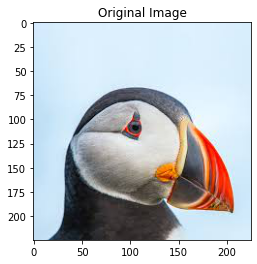

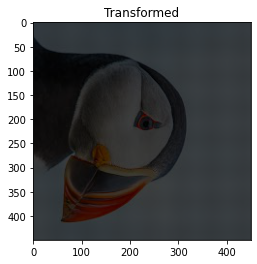

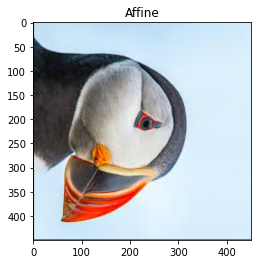

In [5]:
# Import libraries

# Bugs
# When i tried to use the function estimate_transform from lecture, the output image is just black.
# Then i went to the official documentation to check whether it is parameter problem
# I found another function AffineTransform from the skimage library whichis very efficient and allows to input the rotation and scaling as parameters 
import numpy as np
from skimage import io,transform
import matplotlib.pyplot as plt
from skimage.transform import warp


# read tbe image and find the surface shape 
image1 = io.imread('lab5_img.jpeg')
h = image1.shape[0]
w = image1.shape[1]
# create the rotation matrix of clockwise 90 degree
T_r = np.array([[0,1], [-1, 0]])
# create the scaling matrix with scale of 2
T_s = np.array([[2,0], [0,2]])
# dot product of two transformation matrix to get a combined transformation matrix
combined = T_s.dot(T_r)

# initialize an empty numpy array. Since this is color image, not gray image, the parameter should be (h,w,3)
trans = np.zeros((450, 450,3), dtype = np.uint8)
# two for loops go through every pixel of the image and apply transformation to every pixel location by dot product of combined transformation and transpose of pixel coordinate
for i in range(h):
  for j in range(w):
    pixel = np.array([i,j])
    pix_val = image1[i,j]
    #print(pix_val)
    new_pix = combined.dot(pixel.T)
    a = new_pix[0]
    b = new_pix[1]
    #print((a,b))
    # assign the pixel value of original location to the new location pixel
    trans[a, b] = pix_val

# initialize a new numpy array for the color image
imageAffine = np.empty((h*2,w*2,image1.shape[2]),dtype = np.uint8)
# use AffinTransform function from skimage.tranform module to get a affine transform matrix
# input parameters are the rotations and scales we apply on the image
tform = transform.AffineTransform(scale=(2,2),rotation=np.deg2rad(90),translation=(w*2,0))
# use warp from skimage.transform to Warp an image according to the given affine inverse transformation.
img_warped = warp(image1,tform.inverse, output_shape= imageAffine.shape, order=0)

# plot original image
plt.title('Original Image')
plt.imshow(image1,cmap='gray')
plt.show()

# plot transformed image using combine transformation
plt.title('Transformed')
plt.imshow(trans)
plt.show()

# plot affine tranformed image
plt.title('Affine')
plt.imshow(img_warped)
plt.show()


 
